In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Load data
data = pd.read_csv('StudentPerformanceFactors.csv')
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
# Check dimmension of data
data.shape

(6607, 20)

In [4]:
# Check for missing values
data.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [5]:
# Remove columns with missing values
data = data.drop(['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], axis = 1)
data.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Gender                        0
Exam_Score                    0
dtype: int64

In [6]:
# Understand column types
data.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Gender                        object
Exam_Score                     int64
dtype: object

In [7]:
# Check for duplicates
data.duplicated().sum()

0

In [8]:
# Understand numerical data
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


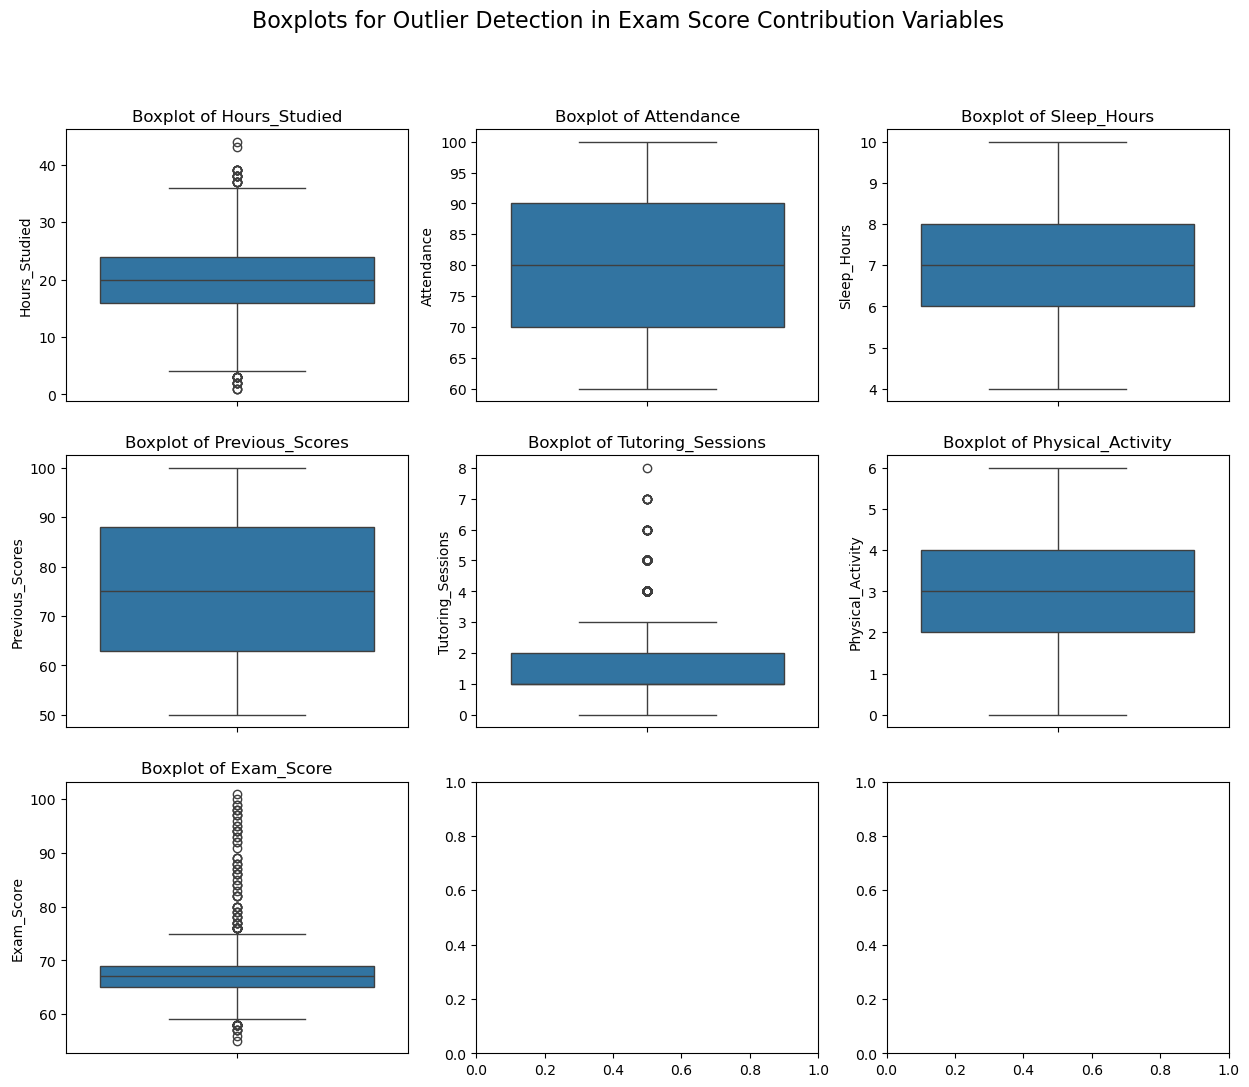

In [9]:
# Creating boxplots for outlier detection in numerical variables
fig, axes = plt.subplots(3, 3, figsize=(15,12))
fig.suptitle("Boxplots for Outlier Detection in Exam Score Contribution Variables", fontsize=16)

# List of columns to plot
columns_to_plot = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

# Create boxplots for each variable
for ax, col in zip(axes.flatten(), columns_to_plot):
    sns.boxplot(y=data[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

# Adjust layout for better readability
plt.show()

In [10]:
# Count Outliers
def count_outliers(column, data):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Detect outliers for all numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
outliers = []
for col in numerical_features:
    outliers.append({
        'Feature': col,
        'Num of outliers': count_outliers(col, data)
    })

# Convert to DataFrame and display
outliers_df = pd.DataFrame(outliers)
print(outliers_df)

             Feature  Num of outliers
0      Hours_Studied               43
1         Attendance                0
2        Sleep_Hours                0
3    Previous_Scores                0
4  Tutoring_Sessions              430
5  Physical_Activity                0
6         Exam_Score              104


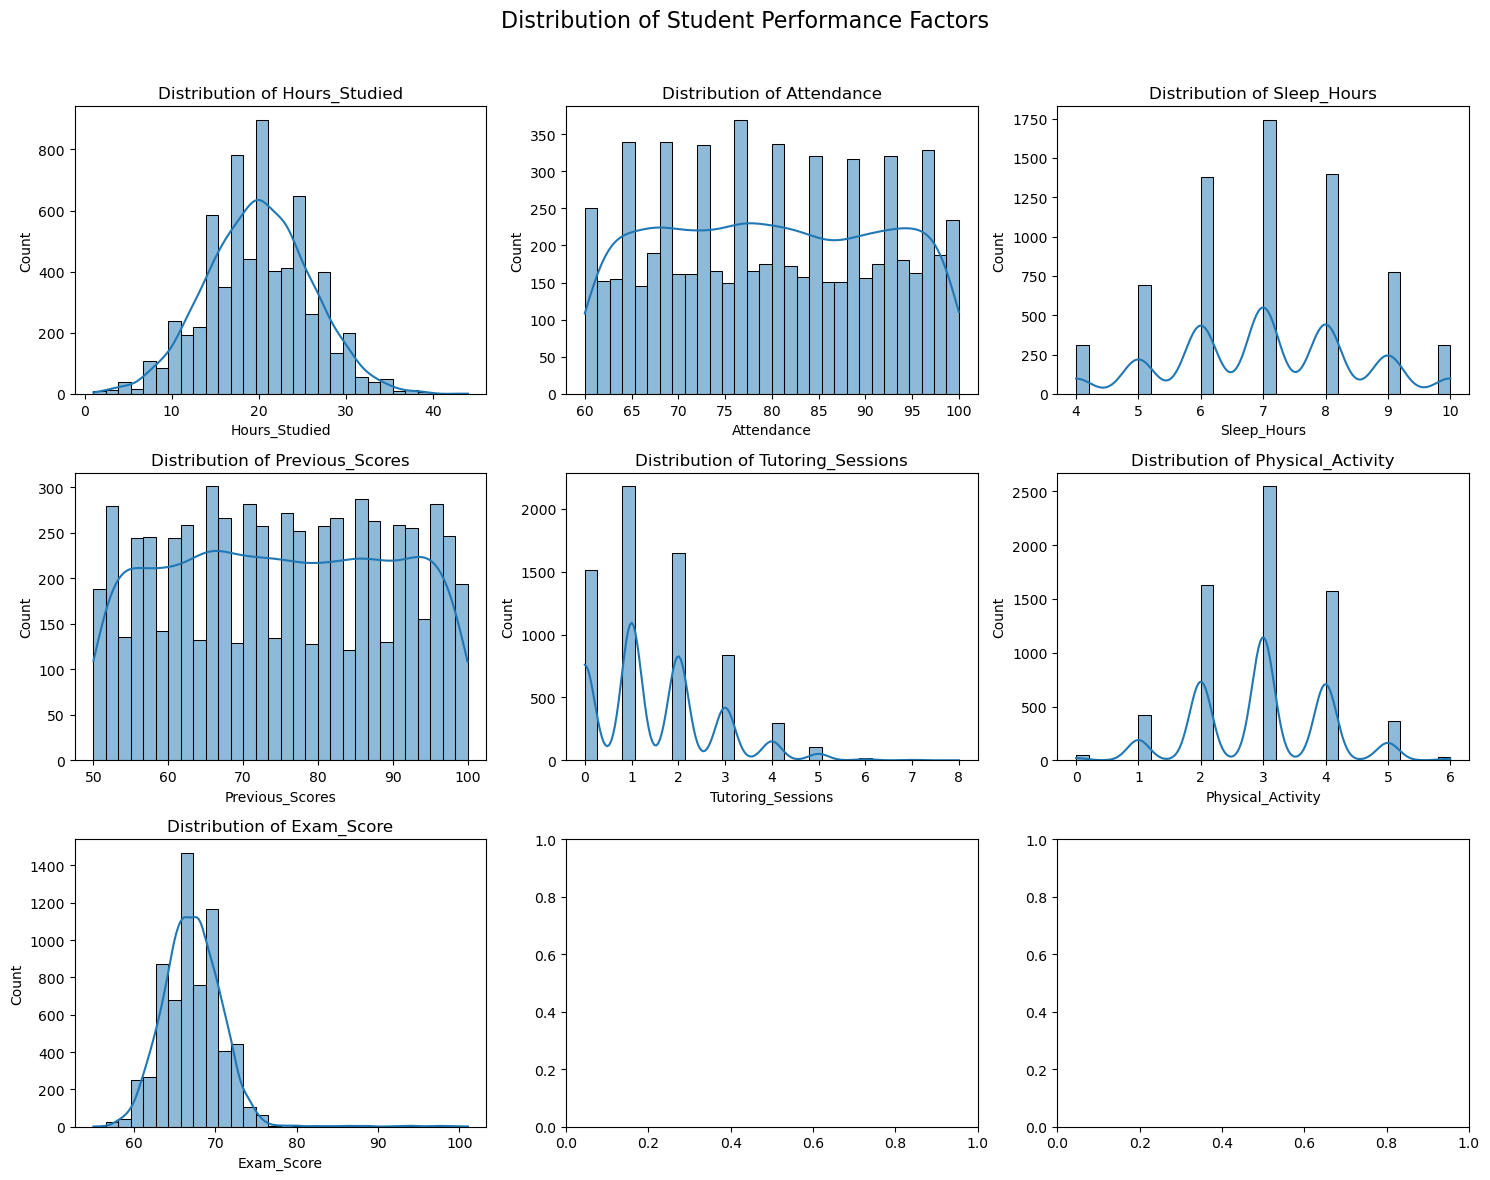

In [11]:
# Creating distribution plots for Student Performance Factors
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Distribution of Student Performance Factors", fontsize=16)

# List of columns to plot
columns_to_plot = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
for ax, col in zip(axes.flatten(), columns_to_plot):
    sns.histplot(data[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [12]:
# One-hot encode categorical columns
data_dummies = pd.get_dummies(data, columns=['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Gender'], drop_first=False)

In [13]:
# Show Data with Dummy Variables
data_dummies.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Family_Income_Medium,School_Type_Private,School_Type_Public,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_No,Learning_Disabilities_Yes,Gender_Female,Gender_Male
0,23,84,7,73,0,3,67,False,True,False,...,False,False,True,False,False,True,True,False,False,True
1,19,64,8,59,2,4,61,False,True,False,...,True,False,True,True,False,False,True,False,True,False
2,24,98,7,91,2,4,74,False,False,True,...,True,False,True,False,True,False,True,False,False,True
3,29,89,8,98,1,4,71,False,True,False,...,True,False,True,True,False,False,True,False,False,True
4,19,92,6,65,3,4,70,False,False,True,...,True,False,True,False,True,False,True,False,True,False


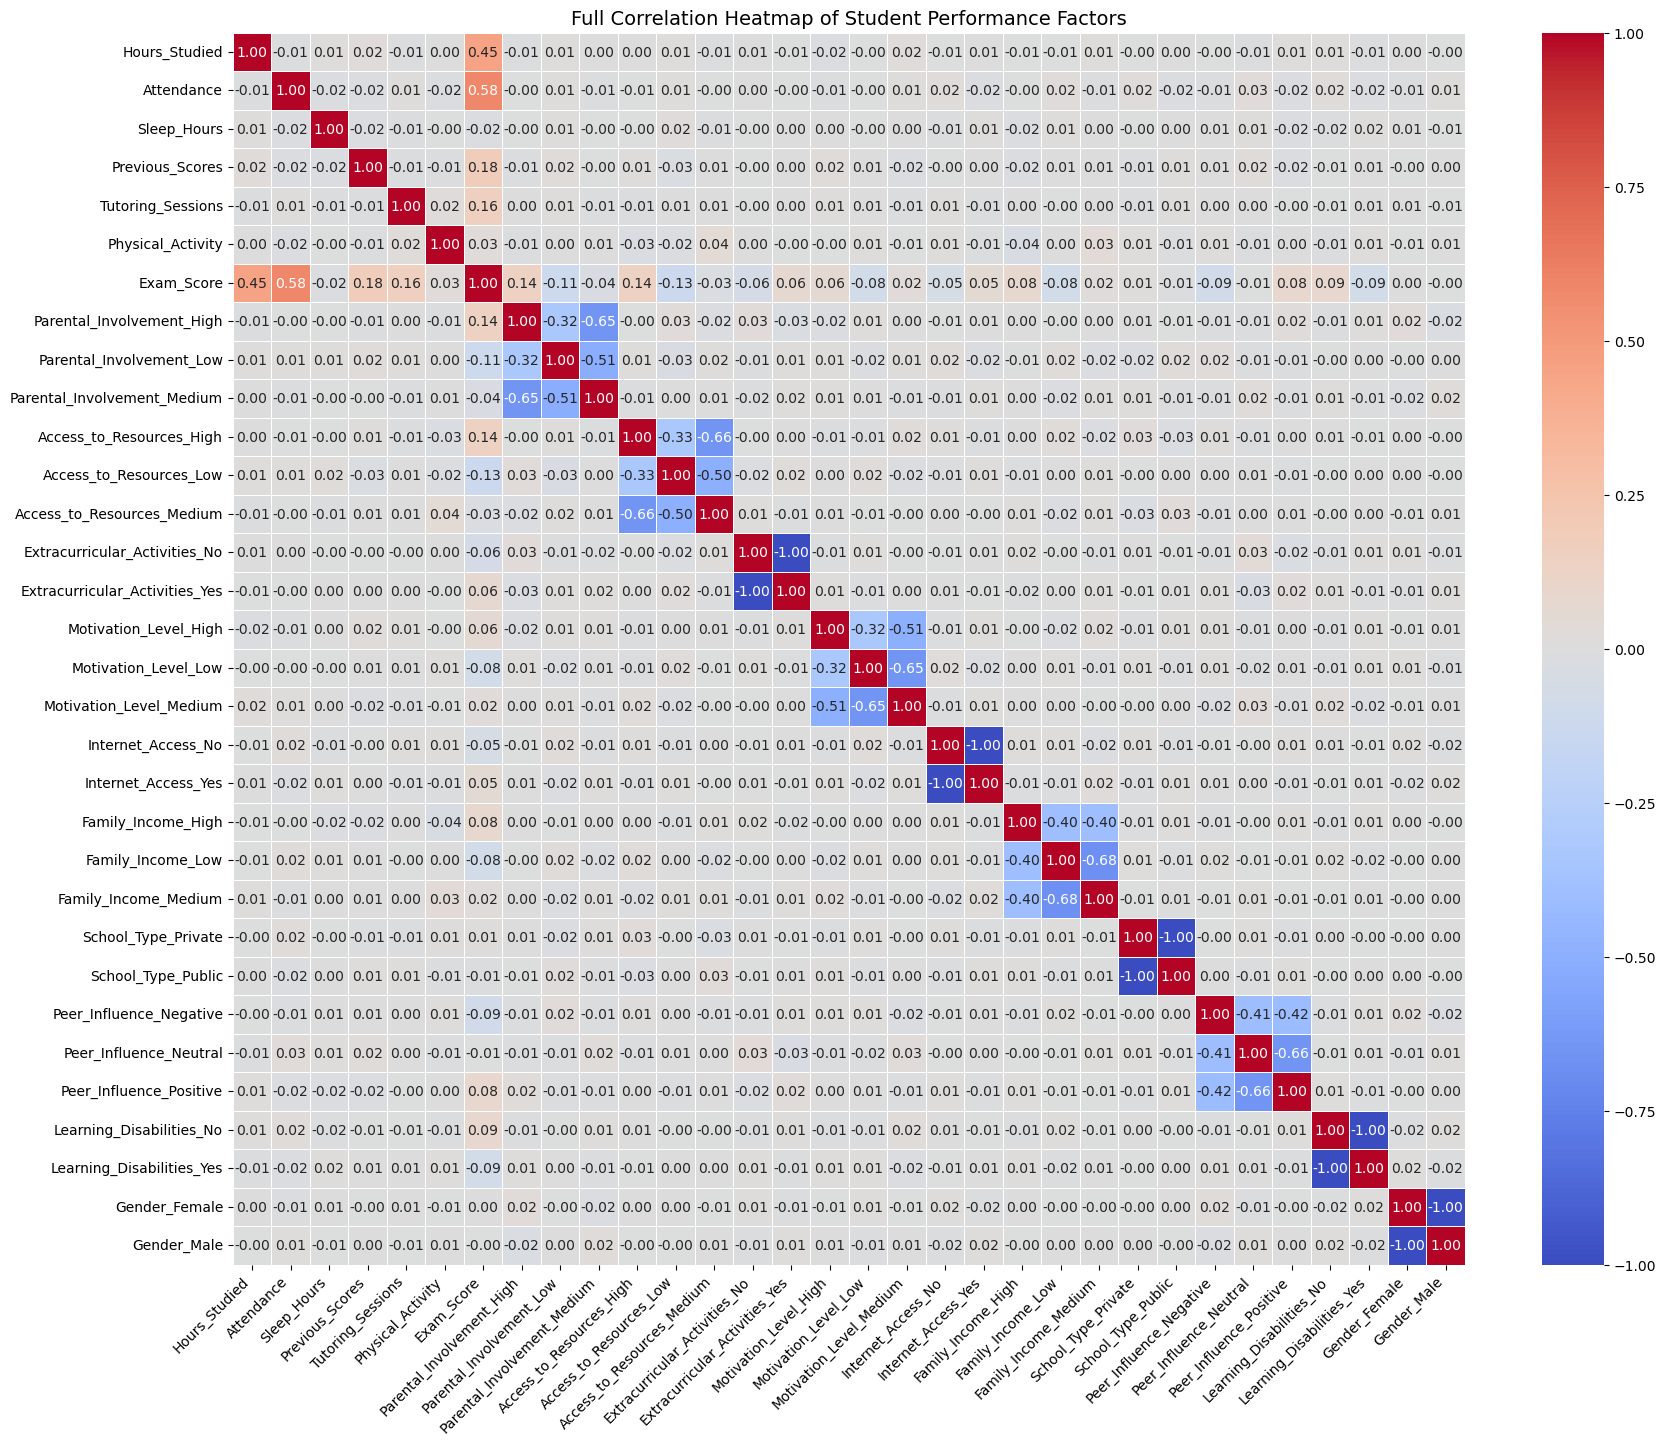

In [14]:
# Create Correlation Heatmap to conduct preliminary analysis
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(data_dummies.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10}, square=True)

# Improve layout and readability
plt.title("Full Correlation Heatmap of Student Performance Factors", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [15]:
# Create feature and target variables
X = data_dummies.drop('Exam_Score', axis=1)
y = data_dummies['Exam_Score']

In [16]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [17]:
# Standardize numerical Feataures
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Identify which models will be tested with the data
models = {
      "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [19]:
# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    results[name] = {"RMSE": rmse, "MAE": mae, "R^2": r2}
    
results = pd.DataFrame(results)
results

,Linear Regression,Random Forest,Gradient Boosting
RMSE,1.898981,2.174966,1.973750
MAE,0.672551,1.113313,0.868548
R^2,0.744881,0.665338,0.724395


In [20]:
# Get top 3 features for each model

# Linear Regression - based on absolute value of coefficients
lr_coeffs = pd.Series(np.abs(models["Linear Regression"].coef_), index=X.columns)
top3_lr = lr_coeffs.sort_values(ascending=False).head(3)

# Random Forest - based on feature importance
rf_importances = pd.Series(models["Random Forest"].feature_importances_, index=X.columns)
top3_rf = rf_importances.sort_values(ascending=False).head(3)

# Gradient Boosting - based on feature importance
gb_importances = pd.Series(models["Gradient Boosting"].feature_importances_, index=X.columns)
top3_gb = gb_importances.sort_values(ascending=False).head(3)

# Combine results into a single DataFrame for display
top_features_df = pd.DataFrame({
    "Linear Regression": top3_lr.index,
    "Random Forest": top3_rf.index,
    "Gradient Boosting": top3_gb.index
})
top_features_df

,Linear Regression,Random Forest,Gradient Boosting
0,Parental_Involvement_Medium,Attendance,Attendance
1,Parental_Involvement_High,Hours_Studied,Hours_Studied
2,Parental_Involvement_Low,Previous_Scores,Previous_Scores


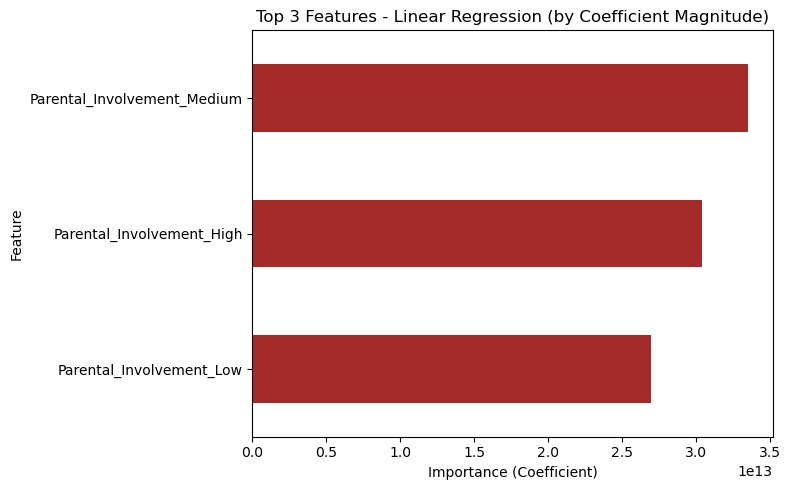

In [21]:
# Plot the top 3 features by importance (Linear Regression)
plt.figure(figsize=(8, 5))
top3_lr.sort_values().plot(kind='barh', color='brown')
plt.title('Top 3 Features - Linear Regression (by Coefficient Magnitude)')
plt.xlabel('Importance (Coefficient)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

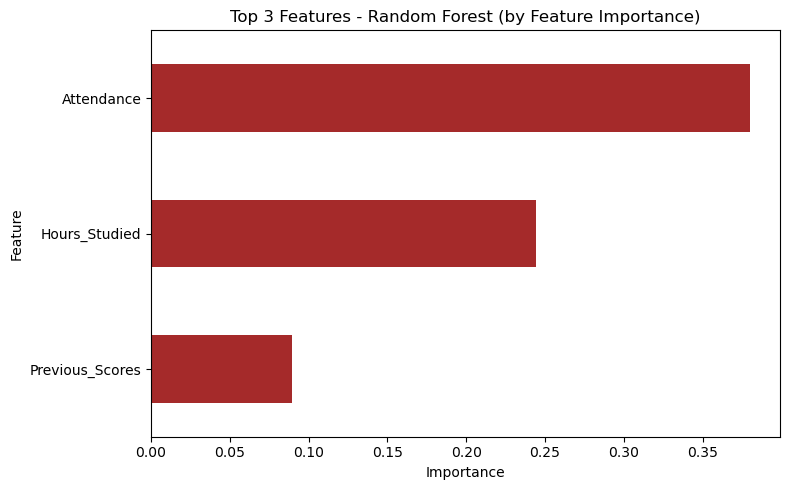

In [23]:
# Plot top 3 features for Random Forest
plt.figure(figsize=(8, 5))
top3_rf.sort_values().plot(kind='barh', color='brown')
plt.title('Top 3 Features - Random Forest (by Feature Importance)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

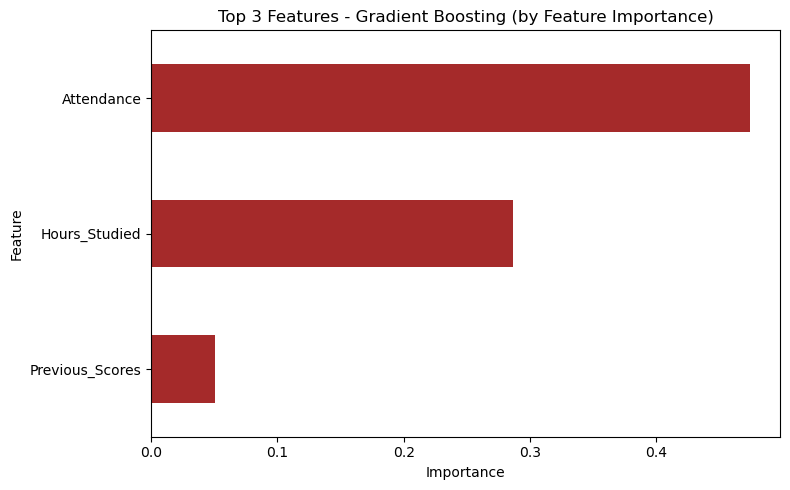

In [25]:
# Plot top 3 features for Gradient Boosting
plt.figure(figsize=(8, 5))
top3_gb.sort_values().plot(kind='barh', color='brown')
plt.title('Top 3 Features - Gradient Boosting (by Feature Importance)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()